In [143]:
import pandas as pd
from pandarallel import pandarallel
pandarallel.initialize()
pd.set_option('max_colwidth', 140)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [144]:
data = pd.read_csv("kata/emotionData.csv")
# data = data[data.label != 'anger']

In [145]:
data.reset_index(drop=True, inplace=True)

In [146]:
data.groupby('label')['tweet'].nunique()

label
anger      1100
fear        646
happy      1012
love        636
sadness     996
Name: tweet, dtype: int64

In [147]:
data

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernur .Emangny polisi tdk ikut pmbhasan? Jgn berpolitik. Pengaturan wilayah,hak gubernur. Pers..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebih rasain lah yang harus sibuk jaga diri, rasain sakitnya haid, dan paniknya pulang malem s..."
2,happy,"Kepingin gudeg mbarek Bu hj. Amad Foto dari google, sengaja, biar teman-teman jg membayangkannya. Berbagi itu indah."
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Pengaturan wilayah tgg jwb dan wwnang gub.Tng Abng soal rumit,sejak gub2 , trdahulu.Skrg sedng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 batalin tiket di stasiun pasar senen, lancar, antrian tidak terlalu rame,15 menitan dan beress..."
...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan matanya dan menahan gejolak dan batinnya. Bahwa papa sangat ingin mengikuti keinginanmu tap..."
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di Pilpres 2019 salah satunya disebabkan gemuknya partai koalisi yang mengusung petahana. Seh...
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana mau jelas coba? lulusan seni, bisanya cuma nari, mau kerja apa? nari-nari doang. berapa si..."
4399,happy,"[USERNAME] dulu beneran ada mahasiswa Teknik UI nembak pacarnya pas sahur di Kukusan Teknik Depok, diliput kru Katakan Cinta (dan belum ..."


In [148]:
idiom = pd.read_csv("kata/idioms_id.txt", sep=":")
idiom

,tweet,score
0,acungi jempol,5
1,anak alay,-4
2,anak emas,4
3,banting tulang,2
4,banyak akal,4
...,...,...
87,terima kasih,4
88,tinggi hati,-4
89,tuhan memberkati,5
90,tukang tipu,-5


In [149]:
emoticon = pd.read_csv("kata/emoticon_id.txt", sep='\s\|\s', engine='python')
emoticon

,emot,score
0,^^v,4
1,^_^,4
2,xp,-4
3,^^V,4
4,xd,2
...,...,...
624,x-(,-4
625,xd,2
626,xo,2
627,xp,-4


In [150]:
kata = pd.read_csv("kata/sentiWord.txt", sep=":")
kata

,tweet,score
0,abadi,5
1,absen,-3
2,abu-abu,-1
3,acuh,4
4,adil,5
...,...,...
1724,wow,4
1725,wtf,-4
1726,yatim,-1
1727,yeah,3


In [151]:
akronim = pd.read_csv("kata/akronim.csv", usecols=['slang', 'formal'])
akronim

,slang,formal
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa
...,...,...
15001,gataunya,enggak taunya
15002,gtau,enggak tau
15003,gatau,enggak tau
15004,fans2,fan-fan


In [152]:
stoplist = pd.read_csv("kata/stoplist.txt")
stoplist

,word
0,ada
1,adalah
2,adanya
3,adapun
4,agak
...,...
753,wong
754,yaitu
755,yakin
756,yakni


In [153]:
negasi = pd.read_csv("kata/negatingword.txt")
negasi

,word
0,belum
1,bukan
2,tak
3,tanpa
4,tidak
5,pantang
6,jangan
7,bukanlah
8,sok
9,tidak pernah


In [154]:
def anything_to_sentiment(anything):
    if type(anything) == str:
        if anything in ['love', 'happy']:
            return 'pos'
        elif anything in ['fear', 'sadness']:
            return 'neg'
        else:
            return 'neu'
    elif type(anything) == int:
        if anything > 1:
            return 'pos'
        elif anything < -1:
            return 'neg'
        else:
            return 'neu'

In [155]:
data['sentiment'] = data['label'].astype(str).apply(anything_to_sentiment)
data.to_csv('sentimentedKata/tweetSent.csv', index=False)
data

,label,tweet,sentiment
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernur .Emangny polisi tdk ikut pmbhasan? Jgn berpolitik. Pengaturan wilayah,hak gubernur. Pers...",neu
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebih rasain lah yang harus sibuk jaga diri, rasain sakitnya haid, dan paniknya pulang malem s...",neu
2,happy,"Kepingin gudeg mbarek Bu hj. Amad Foto dari google, sengaja, biar teman-teman jg membayangkannya. Berbagi itu indah.",pos
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Pengaturan wilayah tgg jwb dan wwnang gub.Tng Abng soal rumit,sejak gub2 , trdahulu.Skrg sedng...",neu
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 batalin tiket di stasiun pasar senen, lancar, antrian tidak terlalu rame,15 menitan dan beress...",pos
...,...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan matanya dan menahan gejolak dan batinnya. Bahwa papa sangat ingin mengikuti keinginanmu tap...",pos
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di Pilpres 2019 salah satunya disebabkan gemuknya partai koalisi yang mengusung petahana. Seh...,neg
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana mau jelas coba? lulusan seni, bisanya cuma nari, mau kerja apa? nari-nari doang. berapa si...",neu
4399,happy,"[USERNAME] dulu beneran ada mahasiswa Teknik UI nembak pacarnya pas sahur di Kukusan Teknik Depok, diliput kru Katakan Cinta (dan belum ...",pos


In [156]:
idiom['sentiment'] = idiom['score'].astype(int).apply(anything_to_sentiment)
idiom.to_csv('sentimentedKata/idiom.csv', index=False)
idiom.groupby('sentiment')['tweet'].nunique()

sentiment
neg    44
neu    24
pos    24
Name: tweet, dtype: int64

In [157]:
emoticon['sentiment'] = emoticon['score'].astype(int).apply(anything_to_sentiment)
emoticon.to_csv('sentimentedKata/emoticon.csv', index=False)
emoticon.groupby('sentiment')['emot'].nunique()

sentiment
neg    52
pos    45
Name: emot, dtype: int64

In [158]:
kata['sentiment'] = kata['score'].astype(int).apply(anything_to_sentiment)
kata.to_csv('sentimentedKata/kata.csv', index=False)
kata.groupby('sentiment')['tweet'].nunique()

sentiment
neg    1078
neu     189
pos     462
Name: tweet, dtype: int64

In [159]:
kamusAlay = dict(zip(akronim.slang, akronim.formal))
punct = '!"#$%&\'()*+,./:;<=>?@\\^_`{|}~'

def slang_to_formal(tweet):
    tweet = tweet.translate(str.maketrans(punct, len(punct)*" "))
    slang = tweet.split()
    formal = []
    for word in slang:
        if not word.isdigit():
            if word in kamusAlay:
                formal.extend(kamusAlay[word].split())
            else:
                formal.append(word)
    return " ".join(formal)

In [160]:
import re


def make_pattern(text):
    pattern = "|".join(map(re.escape, text))
    pattern = r"(?u)(?<=\s)(" + pattern + ")(?=\s)"
#                "(?<=\s)(" + pattern + ")",
#                "(" + pattern + ")(?=\s)"]
    return re.compile(pattern)


bannedWord = ['covid', 'corona', 'virus', 'coronavirus'
#              ,'baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'not', 'nya', 'olah', 'sekurang', 'tama'
             ]
stop = stoplist.word.to_list() + bannedWord
neg_emot = make_pattern(emoticon.emot[emoticon.sentiment == 'neg'][::-1])
pos_emot = make_pattern(emoticon.emot[emoticon.sentiment == 'pos'][::-1])
negate = make_pattern(negasi.word.to_list())
url = re.compile(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?\xab\xbb\u201c\u201d\u2018\u2019]))')
username = "@\w{1,}"
hashtag = "#\w{1,}"
tags = ['[neg]', '[pos]', '[url]', '[username]', '[not]']
patterns = [neg_emot, pos_emot, url, username, hashtag, negate, stop]
# database = dict(zip(tags, patterns))


def replace_with_tag(tweet):
    tweet = tweet.lower()
#     tweet = ' '.join(word_tokenize(tweet))
    tweet = re.sub(url, ' [url] ', tweet)
    tweet = re.sub(username, ' [username] ', tweet)
    tweet = re.sub(hashtag, ' ', tweet)
    tweet = re.sub(neg_emot, ' [neg] ', tweet)
    tweet = re.sub(pos_emot, ' [pos] ', tweet)
    tweet = slang_to_formal(tweet)
    tweet = re.sub(negate, ' [not] ', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = re.sub(' +', ' ', tweet)
    return tweet



In [161]:
datas = [pd.read_csv('sentimentedKata/tweetSent.csv'), pd.read_csv('sentimentedKata/idiom.csv'),
         pd.read_csv('sentimentedKata/kata.csv')]

dataCleaned = pd.concat(datas)
dataCleaned.drop_duplicates(subset='tweet', keep='first', inplace=True)
dataCleaned.reset_index(drop=True, inplace=True)
dataCleaned.groupby('sentiment')['tweet'].nunique()

sentiment
neg    2763
neu    1313
pos    2134
Name: tweet, dtype: int64

In [162]:
import random
import numpy as np
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB as NB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV


text_clf = Pipeline([('vect', TfidfVectorizer()),
#                      ('tfidf', TfidfTransformer()),
                     ('clf', NB())])



# params = {
#           'vect__ngram_range': [(1,1), (1,2), (1,3)],
#           'vect__binary': (True, False),
#           'tfidf__use_idf': (True, False),
#             'clf__alpha': np.linspace(0,1,100)
#           }

tweet = dataCleaned['tweet'].values
sent = dataCleaned['sentiment'].values

In [163]:
vocab = pd.read_csv("serangkai/kamus-kata-dasar.csv")
vocab
# dataCleaned['score'].mean()

,a
0,ab
1,aba
2,aba-aba
3,abad
4,abadi
...,...
30336,zulmat
30337,zulu
30338,zurafah
30339,zuriah


In [164]:
# best_param = {'tfidf__use_idf': False, 'vect__binary': True, 'vect__ngram_range': (1, 3)}
text_clf.set_params(vect__preprocessor=replace_with_tag)
text_clf.set_params(vect__min_df=5)
text_clf.set_params(vect__max_df=0.7)
# text_clf.set_params(vect__vocabulary=vocab.kata.to_list())
text_clf.set_params(vect__binary=False)
text_clf.set_params(vect__ngram_range=(1,2))
text_clf.set_params(vect__stop_words=stop)
text_clf.set_params(vect__token_pattern=r'(?u)\[\w{3,}\]|\b\w{4,}\-?\w+\b')
# text_clf.set_params(tfidf__use_idf=False)
text_clf.set_params(clf__alpha=0.5)

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.7, min_df=5, ngram_range=(1, 2),
                                 preprocessor=<function replace_with_tag at 0x7f5044a71f70>,
                                 stop_words=['ada', 'adalah', 'adanya',
                                             'adapun', 'agak', 'agaknya',
                                             'agar', 'akan', 'akankah', 'akhir',
                                             'akhiri', 'akhirnya', 'aku',
                                             'akulah', 'amat', 'amatlah',
                                             'anda', 'andalah', 'antar',
                                             'antara', 'antaranya', 'apa',
                                             'apaan', 'apabila', 'apakah',
                                             'apalagi', 'apatah', 'artinya',
                                             'asal', 'asalkan', ...],
                                 token_pattern='(?u)\\[\\w{3,}

In [165]:
# gs_clf = GridSearchCV(text_clf, params, cv=5, n_jobs=-1)

# gs_clf = gs_clf.fit(tweet, sent)

In [166]:
# pd.DataFrame(gs_clf.cv_results_)

In [167]:
# gs_clf.predict_proba(["ilham tidak senang"])

In [234]:
X_train, X_test, y_train, y_test = train_test_split(tweet, sent, test_size=0.1, random_state=random.randint(1, 10000))
# text_clf.fit(tweet, sent)

In [235]:
text_clf.fit(X_train, y_train)
text_clf.score(X_test, y_test)

0.6392914653784219

In [236]:
text = "Saya lapar dan tidak mau vaksin, saya benci vaksin"
print(text)
print("{a[0]:.2}% negatif \n{a[1]:.2}% neutral\n{a[2]:.2}% positif".
      format(a = text_clf.predict_proba([text]).tolist()[0]))
# text_clf.predict_proba([text])

Saya lapar dan tidak mau vaksin, saya benci vaksin
0.54% negatif 
0.29% neutral
0.17% positif


In [237]:
coef = text_clf.get_params()['clf']

feature = text_clf.get_params()['vect']

def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f:%-15s\t%.4f:%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):

    labelid = list(classifier.classes_).index(classlabel)

    feature_names = vectorizer.get_feature_names()

    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:

        print(classlabel, feat, coef)

most_informative_feature_for_class(feature, coef, 'pos', 20)

pos alhamdulillah -5.50310606549416
pos bikin -5.5010832931616624
pos jatuh cinta -5.492223058301122
pos bahagia -5.483393501688994
pos allah -5.389770757025309
pos [username] [username] -5.364718843564921
pos kayak -5.355059506981654
pos jatuh -5.336306703924806
pos terima kasih -5.26313250872532
pos selamat -5.181392477838556
pos terima -5.155626310204111
pos semoga -5.027309795855674
pos orang -4.9876039705309285
pos kasih -4.873668323406829
pos banget -4.59374398129463
pos [url] -4.473051514377042
pos [not] -4.292472031780539
pos cinta -4.21494413720386
pos [username] -4.181261563660275
pos sayang -4.071229589069347


/var/home/ilpez/PycharmProjects/twitter-sentiment-analysis/venv/lib64/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [238]:
show_most_informative_features(feature, coef)

	-9.1588:[not] lihat    	-4.1143:[not]          
	-9.1588:[not] sekedar  	-4.1680:takut          
	-9.1588:[username] alhamdulillah	-4.4346:[username]     
	-9.1588:[username] kemarin	-4.6241:orang          
	-9.1588:[username] sehat	-4.8181:banget         
	-9.1588:[username] semoga	-5.0858:[url]          
	-9.1588:[username] terima	-5.1399:kayak          
	-9.1588:akrab          	-5.2124:teman          
	-9.1588:aktif          	-5.2472:salah          
	-9.1588:allah allah    	-5.2779:sakit          
	-9.1588:amanah         	-5.3382:seram          
	-9.1588:anies          	-5.4350:allah          
	-9.1588:anniversary    	-5.4852:pakai          
	-9.1588:banget [username]	-5.4981:lihat          
	-9.1588:banget sayang  	-5.4983:[username] [username]
	-9.1588:berani speak   	-5.5554:habis          
	-9.1588:berbagi        	-5.5791:pengin         
	-9.1588:berkualitas    	-5.6045:bikin          
	-9.1588:bermanfaat     	-5.6064:[neg]          
	-9.1588:bikin status   	-5.6360:ngeri      

In [239]:
from sklearn.metrics import classification_report
y_pred = text_clf.predict(X_train)

print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

         neg       0.92      0.69      0.79      3322
         neu       0.55      0.84      0.66       772
         pos       0.68      0.87      0.76      1495

    accuracy                           0.76      5589
   macro avg       0.71      0.80      0.74      5589
weighted avg       0.80      0.76      0.76      5589



In [240]:
tokenize = feature.build_tokenizer()
tokenize(X_train[2])

['lukisan',
 'teakhir',
 'slese',
 'kemaren',
 'sudah',
 'bungkus',
 'pulang',
 'Smoga',
 'berkenan']

In [241]:
print(X_train[2])

Done.. lukisan teakhir dah slese kemaren & sudah di bungkus di bawa pulang.. Smoga berkenan.. like this 


In [242]:
print(feature.inverse_transform(coef.feature_log_prob_))

[array(['[askmf]', '[neg]', '[not]', ..., 'yaelah', 'yaudah', 'zaman'],
      dtype='<U24'), array(['[askmf]', '[neg]', '[not]', ..., 'yaelah', 'yaudah', 'zaman'],
      dtype='<U24'), array(['[askmf]', '[neg]', '[not]', ..., 'yaelah', 'yaudah', 'zaman'],
      dtype='<U24')]


In [213]:
print(text_clf.predict_proba([X_train[2]]))

[[0.10675537 0.00896018 0.88428445]]


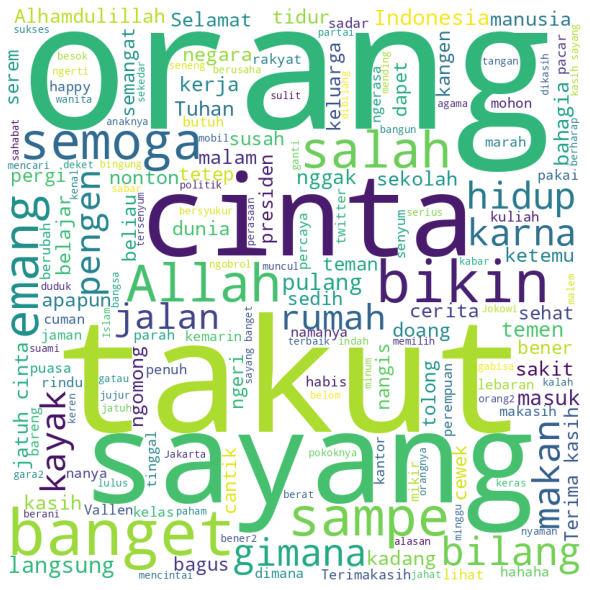

In [178]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
words = " ".join(tweet for tweet in tweet)
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white',
                      stopwords=stop+tags,
                      regexp=r'(?u)\[\w{3,}\]|\b\w{4,}\-?\w+\b',
                      min_font_size = 11).generate(words)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [179]:
print(coef.feature_log_prob_)

[[-6.67715924 -5.68758237 -8.17778941 ... -6.9893493  -8.35525374
  -7.47011417]
 [-8.95402697 -8.38344955 -8.22003887 ... -7.25846983 -8.95402697
  -7.33176163]
 [-9.2716927  -7.5329386  -9.2716927  ... -7.62869962 -7.68011734
  -7.68478456]]


In [180]:
for tag in tags:
    print(tag + ": " + "{0}".format(text_clf.get_params()['vect'].vocabulary_[tag]))

[neg]: 1
[pos]: 38
[url]: 40
[username]: 42
[not]: 3
